<a href="https://colab.research.google.com/github/wentaoy/hello-world/blob/master/CIS_519_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Prepocessing


In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('oasis_longitudinal.csv')

# delete non-useful data features
# delet Subject ID, MRI ID, Visit, MR Delay, Hand 
df = df.drop(['Subject ID', 'MRI ID', 'Visit', 'MR Delay', 'Hand'], axis = 1)

# One-Hot encoded
df['M/F'] = df['M/F'].replace(['F', 'M'], [0,1]) # F=0; M=1
df['Group'] = df['Group'].replace(['Demented', 'Nondemented', 'Converted'], [0,1,2]) # Demented=0; Nondemented=1; Converted=2

# fill missing values with mean
df.fillna(df.mean(), inplace=True)

df.head()

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,1,1,87,14,2.000000,27.0,0.0,1987,0.696,0.883
1,1,1,88,14,2.000000,30.0,0.0,2004,0.681,0.876
2,0,1,75,12,2.460452,23.0,0.5,1678,0.736,1.046
3,0,1,76,12,2.460452,28.0,0.5,1738,0.713,1.010
4,0,1,80,12,2.460452,22.0,0.5,1698,0.701,1.034


Splitting data according to features.


In [ ]:
# set target
Y = df['Group']

# separat dataset into three groups: with only survey-based features, with only MRI features, and with both

X_all_feature = df[['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']]
X_survey_feature = df[['M/F', 'Age', 'EDUC', 'SES', 'MMSE']]
X_MRI_feature = df[['CDR', 'eTIV', 'nWBV', 'ASF']]

# another two groups with no gender feature (ethics consideratioin)
X_all_feature_nogender = df[['Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']]
X_survey_feature_nogender = df[['Age', 'EDUC', 'SES', 'MMSE']]


Training Decision Tree Model

Train on all features.

[0.8933333333333333, 0.8933333333333333, 0.88, 0.8266666666666667, 0.8, 0.8133333333333334, 0.8266666666666667, 0.8, 0.8133333333333334]
[0.8933333333333333, 0.8933333333333333, 0.88, 0.8266666666666667, 0.8266666666666667, 0.8133333333333334, 0.84, 0.8133333333333334]


Text(0, 0.5, 'Score')

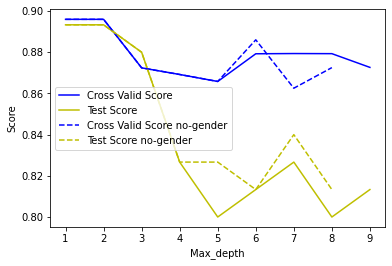

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# split traing and testing data
# split three groups of data, testing size = 0.2
# split data set with all features
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_all_feature, Y, test_size=0.2, random_state=0, shuffle=True)

# have 9 features in total; so, try tree depth from 1 to 9
# cross validate 5 times
cros_valid_score = []
test_score = []
index = []
for i in range(1,10):
  index.append(i)
  decisionTree = DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=i)
  valid_scores = cross_val_score(decisionTree, X_train1, Y_train1, cv = 5, scoring='accuracy')
  valid_score = np.mean(valid_scores)
  cros_valid_score.append(valid_score)

  DTModel = decisionTree.fit(X_train1, Y_train1)
  testScore = DTModel.score(X_test1, Y_test1)
  test_score.append(testScore)

print(test_score)

# split traing and testing data
# split three groups of data, testing size = 0.2
# split data set with all features without no gender feature
X_train1_nogender, X_test1_nogender, Y_train1, Y_test1 = train_test_split(X_all_feature_nogender, Y, test_size=0.2, random_state=0, shuffle=True)

# have 8 features in total; so, try tree depth from 1 to 8
# cross validate 5 times
cros_valid_score_nogender = []
test_score_nogender = []
index_nogender = []
for i in range(1,9):
  index_nogender.append(i)
  decisionTree = DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=i)
  valid_scores_nogender = cross_val_score(decisionTree, X_train1_nogender, Y_train1, cv = 5, scoring='accuracy')
  valid_score_nogender = np.mean(valid_scores_nogender)
  cros_valid_score_nogender.append(valid_score_nogender)

  DTModel = decisionTree.fit(X_train1_nogender, Y_train1)
  testScore_nogender = DTModel.score(X_test1_nogender, Y_test1)
  test_score_nogender.append(testScore_nogender)

print(test_score_nogender)

plt.plot(index, cros_valid_score, 'b-')
plt.plot(index, test_score,'y-')
plt.plot(index_nogender, cros_valid_score_nogender, 'b--')
plt.plot(index_nogender, test_score_nogender,'y--')
plt.legend(['Cross Valid Score', 'Test Score', 'Cross Valid Score no-gender', 'Test Score no-gender'])
plt.xlabel('Max_depth')
plt.ylabel('Score')

Train on survey-based features.

[0.8, 0.8, 0.7066666666666667, 0.7733333333333333, 0.8133333333333334]
[0.8, 0.8, 0.7866666666666666, 0.76]


Text(0, 0.5, 'Score')

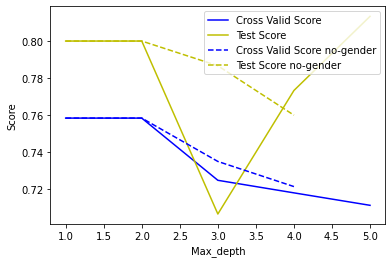

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# split traing and testing data
# split three groups of data, testing size = 0.2
# split data set with only survey-based features
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X_survey_feature, Y, test_size=0.2, random_state=0, shuffle=True)

# have 5 features in total; so, try tree depth from 1 to 5
# cross validate 5 times

cros_valid_score = []
test_score = []
index = []
for i in range(1,6):
  index.append(i)
  decisionTree = DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=i)
  valid_scores = cross_val_score(decisionTree, X_train2, Y_train2, cv = 5, scoring='accuracy')
  valid_score = np.mean(valid_scores)
  cros_valid_score.append(valid_score)

  DTModel = decisionTree.fit(X_train2, Y_train2)
  testScore = DTModel.score(X_test2, Y_test2)
  test_score.append(testScore)

print(test_score)

# split traing and testing data
# split three groups of data, testing size = 0.2
# split data set with only survey-based features with no gender feature
X_train2_nogender, X_test2_nogender, Y_train2, Y_test2 = train_test_split(X_survey_feature_nogender, Y, test_size=0.2, random_state=0, shuffle=True)

# have 4 features in total; so, try tree depth from 1 to 4
# cross validate 5 times

cros_valid_score_nogender = []
test_score_nogender = []
index_nogender = []
for i in range(1,5):
  index_nogender.append(i)
  decisionTree = DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=i)
  valid_scores_nogender = cross_val_score(decisionTree, X_train2_nogender, Y_train2, cv = 5, scoring='accuracy')
  valid_score_nogender = np.mean(valid_scores_nogender)
  cros_valid_score_nogender.append(valid_score_nogender)

  DTModel = decisionTree.fit(X_train2_nogender, Y_train2)
  testScore_nogender = DTModel.score(X_test2_nogender, Y_test2)
  test_score_nogender.append(testScore_nogender)

print(test_score_nogender)

plt.plot(index, cros_valid_score, 'b-')
plt.plot(index, test_score,'y-')
plt.plot(index_nogender, cros_valid_score_nogender, 'b--')
plt.plot(index_nogender, test_score_nogender,'y--')
plt.legend(['Cross Valid Score', 'Test Score', 'Cross Valid Score no-gender', 'Test Score no-gender'])
plt.xlabel('Max_depth')
plt.ylabel('Score')

Train on MRI features.

[0.8933333333333333, 0.8933333333333333, 0.8933333333333333, 0.84]


Text(0, 0.5, 'Score')

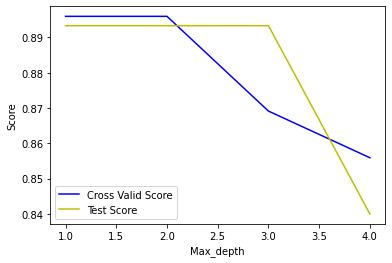

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# split traing and testing data
# split three groups of data, testing size = 0.2
# split data set with only MRI features
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X_MRI_feature, Y, test_size=0.2, random_state=0, shuffle=True)

# have 4 features in total; so, try tree depth from 1 to 4
# cross validate 5 times

cros_valid_score = []
test_score = []
index = []
for i in range(1,5):
  index.append(i)
  decisionTree = DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=i)
  valid_scores = cross_val_score(decisionTree, X_train3, Y_train3, cv = 5, scoring='accuracy')
  valid_score = np.mean(valid_scores)
  cros_valid_score.append(valid_score)

  DTModel = decisionTree.fit(X_train3, Y_train3)
  testScore = DTModel.score(X_test3, Y_test3)
  test_score.append(testScore)

print(test_score)

plt.plot(index, cros_valid_score, 'b-')
plt.plot(index, test_score,'y-')
plt.legend(['Cross Valid Score', 'Test Score'])
plt.xlabel('Max_depth')
plt.ylabel('Score')

Random Forest ( Hyperparameter tuning )

Grid Search Cross Validation (all features)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_all_feature, Y, test_size=0.2, random_state=5, shuffle=True)
n_estimators = [1, 2, 4, 8, 16, 32]
max_depth = [None, 2,4,6,8]
max_features = ['auto', 'sqrt', 'log2']
min_samples_split = [6, 8, 10, 12]
min_samples_leaf = [2, 4, 6, 8, 10]
bootstrap = [True, False]

grid_param = {'n_estimators': n_estimators, 
              'max_depth': max_depth, 
              'max_features': max_features, 
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf, 
              'bootstrap': bootstrap}

random_forest = RandomForestClassifier()
rf_grid = GridSearchCV(random_forest, grid_param)
rf_grid.fit(X_train1, Y_train1)
testScore = rf_grid.score(X_test1, Y_test1)
print("TestScore for Random Forest with Grid Search Cross Validation", testScore)
rf_grid.best_params_

TestScore for Random Forest with Grid Search Cross Validation 0.9066666666666666


{'bootstrap': False,
 'max_depth': 6,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 8,
 'n_estimators': 8}

In [ ]:
# no gender featrue  
X_train1_nogender, X_test1_nogender, Y_train1, Y_test1 = train_test_split(X_all_feature_nogender, Y, test_size=0.2, random_state=5, shuffle=True)
random_forest = RandomForestClassifier()
rf_grid = GridSearchCV(random_forest, grid_param)
rf_grid.fit(X_train1_nogender, Y_train1)
testScore = rf_grid.score(X_test1_nogender, Y_test1)
print("TestScore for Random Forest non-gender with Grid Search Cross Validation", testScore)
rf_grid.best_params_

Grid Search Cross Validation(survey only features)


In [ ]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X_survey_feature, Y, test_size=0.2, random_state=10, shuffle=True)
random_forest = RandomForestClassifier()
rf_grid = GridSearchCV(random_forest, grid_param)
rf_grid.fit(X_train2, Y_train2)
testScore = rf_grid.score(X_test2, Y_test2)
print("TestScore for Random Forest non-gender with Grid Search Cross Validation", testScore)
rf_grid.best_params_

In [ ]:
# no gender featrue  
X_train2_nogender, X_test2_nogender, Y_train2, Y_test2 = train_test_split(X_survey_feature_nogender, Y, test_size=0.2, random_state=5, shuffle=True)
random_forest = RandomForestClassifier()
rf_grid = GridSearchCV(random_forest, grid_param)
rf_grid.fit(X_train2_nogender, Y_train2)
testScore = rf_grid.score(X_test2_nogender, Y_test2)
print("TestScore for Random Forest non-gender with Grid Search Cross Validation", testScore)
rf_grid.best_params_

TestScore for Random Forest non-gender with Grid Search Cross Validation 0.76


{'bootstrap': True,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 8}

Grid Search Cross Validation(MRI only features)

In [ ]:
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X_MRI_feature, Y, test_size=0.2, random_state=11, shuffle=True)
random_forest = RandomForestClassifier()
rf_grid = GridSearchCV(random_forest, grid_param)
rf_grid.fit(X_train3, Y_train3)
testScore = rf_grid.score(X_test3, Y_test3)
print("TestScore for Random Forest non-gender with Grid Search Cross Validation", testScore)
rf_grid.best_params_

TestScore for Random Forest non-gender with Grid Search Cross Validation 0.96


{'bootstrap': True,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 32}

Random Forest All Features (Random Hyperparameter Search: tuning hyperparameters)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_all_feature, Y, test_size=0.2, random_state=19, shuffle=True)
n_estimators = [1, 2, 4, 8, 16, 32, 64, 128, 500, 1000]
max_depth = [None, 1, 2,3, 4, 5, 6, 7, 8]
max_features = ['auto', 'sqrt', 'log2']
min_samples_split = [6, 8, 10, 12]
min_samples_leaf = [2, 4, 6, 8, 10]
bootstrap = [True, False]

grid_param = {'n_estimators': n_estimators, 
              'max_depth': max_depth, 
              'max_features': max_features, 
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf, 
              'bootstrap': bootstrap}

random_forest = RandomForestClassifier()
rf_rand = RandomizedSearchCV(random_forest, grid_param)
rf_rand.fit(X_train1, Y_train1)
testScore = rf_rand.score(X_test1, Y_test1)

print("TestScore for Random Forest with Grid Search Cross Validation", testScore)
rf_rand.best_params_

TestScore for Random Forest with Grid Search Cross Validation 0.9333333333333333


{'bootstrap': False,
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 12,
 'n_estimators': 64}

In [ ]:
X_train1_nogender, X_test1_nogender, Y_train1, Y_test1 = train_test_split(X_all_feature_nogender, Y, test_size=0.2, random_state=5, shuffle=True)
random_forest = RandomForestClassifier()
rf_rand = RandomizedSearchCV(random_forest, grid_param)
rf_rand.fit(X_train1_nogender, Y_train1)
testScore = rf_rand.score(X_test1_nogender, Y_test1)
print("TestScore for Non-gender Random Forest with Grid Search Cross Validation", testScore)
rf_rand.best_params_

TestScore for Non-gender Random Forest with Grid Search Cross Validation 0.92


{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 10,
 'min_samples_split': 6,
 'n_estimators': 1000}

Random Search CV Dataset (Survey Only)

In [ ]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X_survey_feature, Y, test_size=0.2, random_state=10, shuffle=True)
random_forest = RandomForestClassifier()
rf_rand = RandomizedSearchCV(random_forest, grid_param)
rf_rand.fit(X_train2, Y_train2)
testScore = rf_rand.score(X_test2, Y_test2)

print("TestScore for Random Forest with Grid Search Cross Validation", testScore)
rf_rand.best_params_


TestScore for Random Forest with Grid Search Cross Validation 0.8533333333333334


{'bootstrap': True,
 'max_depth': 7,
 'max_features': 'sqrt',
 'min_samples_leaf': 8,
 'min_samples_split': 12,
 'n_estimators': 500}

In [ ]:
X_train2_nogender, X_test2_nogender, Y_train2, Y_test2 = train_test_split(X_survey_feature_nogender, Y, test_size=0.2, random_state=5, shuffle=True)
random_forest = RandomForestClassifier()
rf_rand = RandomizedSearchCV(random_forest, grid_param)
rf_rand.fit(X_train2_nogender, Y_train2)
testScore = rf_grid.score(X_test2_nogender, Y_test2)
print("TestScore for Random Forest non-gender with Grid Search Cross Validation", testScore)
rf_grid.best_params_

TestScore for Random Forest non-gender with Grid Search Cross Validation 0.37333333333333335


{'bootstrap': True,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 32}

In [ ]:
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X_MRI_feature, Y, test_size=0.2, random_state=11, shuffle=True)
random_forest = RandomForestClassifier()
rf_rand = RandomizedSearchCV(random_forest, grid_param)
rf_rand.fit(X_train3, Y_train3)
testScore = rf_grid.score(X_test3, Y_test3)
print("TestScore for Random Forest with Grid Search Cross Validation", testScore)
rf_grid.best_params_

TestScore for Random Forest with Grid Search Cross Validation 0.96


{'bootstrap': True,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 32}

Random Forest All Features (tuning only on max_depth: max_depth vs. accuracy)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_all_feature, Y, test_size=0.2, random_state=5, shuffle=True)
cros_valid_score = []
test_score = []
index = []
for i in range(1,10):
  index.append(i)
  random_forest = RandomForestClassifier(criterion='gini',max_depth=i)
  valid_scores = cross_val_score(random_forest, X_train1, Y_train1, cv = 5, scoring='accuracy')
  valid_score = np.mean(valid_scores)
  cros_valid_score.append(valid_score)

  DTModel = random_forest.fit(X_train1, Y_train1)
  testScore = DTModel.score(X_test1, Y_test1)
  test_score.append(testScore)

# no gender featrue  
X_train1_nogender, X_test1_nogender, Y_train1, Y_test1 = train_test_split(X_all_feature_nogender, Y, test_size=0.2, random_state=5, shuffle=True)
cros_valid_score_nogender = []
test_score_nogender = []
index_nogender = []
for i in range(1,9):
  index_nogender.append(i)
  random_forest = RandomForestClassifier(criterion='gini',max_depth=i)
  valid_scores_nogender = cross_val_score(random_forest, X_train1_nogender, Y_train1, cv = 5, scoring='accuracy')
  valid_score_nogender = np.mean(valid_scores_nogender)
  cros_valid_score_nogender.append(valid_score_nogender)

  DTModel = random_forest.fit(X_train1_nogender, Y_train1)
  testScore_nogender = DTModel.score(X_test1_nogender, Y_test1)
  test_score_nogender.append(testScore_nogender)

plt.plot(index, cros_valid_score, 'b-')
plt.plot(index, test_score,'y-')
plt.plot(index_nogender, cros_valid_score_nogender, 'b--')
plt.plot(index_nogender, test_score_nogender,'y--')
plt.legend(['Cross Valid Score', 'Test Score', 'Cross Valid Score no-gender', 'Test Score no-gender'])
plt.xlabel('Max_depth')
plt.ylabel('Score')

Random Forest on survey based feature


In [ ]:
from sklearn.ensemble import RandomForestClassifier
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X_survey_feature, Y, test_size=0.3, random_state=10, shuffle=True)
cros_valid_score = []
test_score = []
index = []
for i in range(1,6):
  index.append(i)
  random_forest = RandomForestClassifier(criterion='gini',max_depth=i)
  valid_scores = cross_val_score(random_forest, X_train2, Y_train2, cv = 5, scoring='accuracy')
  valid_score = np.mean(valid_scores)
  cros_valid_score.append(valid_score)

  DTModel = random_forest.fit(X_train2, Y_train2)
  testScore = DTModel.score(X_test2, Y_test2)
  test_score.append(testScore)

# no gender feature
X_train2_nogender, X_test2_nogender, Y_train2, Y_test2 = train_test_split(X_survey_feature_nogender, Y, test_size=0.3, random_state=10, shuffle=True)
cros_valid_score_nogender = []
test_score_nogender = []
index_nogender = []
for i in range(1,5):
  index_nogender.append(i)
  random_forest = RandomForestClassifier(criterion='gini',max_depth=i)
  valid_scores_nogender = cross_val_score(random_forest, X_train2_nogender, Y_train2, cv = 5, scoring='accuracy')
  valid_score_nogender = np.mean(valid_scores_nogender)
  cros_valid_score_nogender.append(valid_score_nogender)

  DTModel = random_forest.fit(X_train2_nogender, Y_train2)
  testScore_nogender = DTModel.score(X_test2_nogender, Y_test2)
  test_score_nogender.append(testScore_nogender)

plt.plot(index, cros_valid_score, 'b-')
plt.plot(index, test_score,'y-')
plt.plot(index_nogender, cros_valid_score_nogender, 'b--')
plt.plot(index_nogender, test_score_nogender,'y--')
plt.legend(['Cross Valid Score', 'Test Score', 'Cross Valid Score no-gender', 'Test Score no-gender'])
plt.xlabel('Max_depth')
plt.ylabel('Score')

Random Forest on MRI Tests


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# split traing and testing data
# split three groups of data, testing size = 0.2
# split data set with only MRI features
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X_MRI_feature, Y, test_size=0.2, random_state=11, shuffle=True)

# have 4 features in total; so, try tree depth from 1 to 4
# cross validate 5 times

cros_valid_score = []
test_score = []
index = []
for i in range(1,5):
  index.append(i)
  random_forest = RandomForestClassifier(criterion='gini',max_depth=i)
  valid_scores = cross_val_score(random_forest, X_train3, Y_train3, cv = 5, scoring='accuracy')
  valid_score = np.mean(valid_scores)
  cros_valid_score.append(valid_score)

  DTModel = random_forest.fit(X_train3, Y_train3)
  testScore = DTModel.score(X_test3, Y_test3)
  test_score.append(testScore)

plt.plot(index, cros_valid_score, 'b-')
plt.plot(index, test_score,'y-')
plt.legend(['Cross Valid Score', 'Test Score'])
plt.xlabel('Max_depth')
plt.ylabel('Score')

Neural Network

In [ ]:
# Data prepocessing

import numpy as np
import pandas as pd

df = pd.read_csv('oasis_longitudinal.csv')

# delete non-useful data features
# delet Subject ID, MRI ID, Visit, MR Delay, Hand 
df = df.drop(['Subject ID', 'MRI ID', 'Visit', 'MR Delay', 'Hand'], axis = 1)

# One-Hot encoded
df['M/F'] = df['M/F'].replace(['F', 'M'], [0,1]) # F=0; M=1
df['Group'] = df['Group'].replace(['Demented', 'Nondemented', 'Converted'], [0,1,2]) # Demented=0; Nondemented=1; Converted=2

# fill missing values with mean
df.fillna(df.mean(), inplace=True)

# min-max normalize data
df['Age'] = (df['Age']-df['Age'].min())/(df['Age'].max()-df['Age'].min())
df['EDUC'] = (df['EDUC']-df['EDUC'].min())/(df['EDUC'].max()-df['EDUC'].min())
df['SES'] = (df['SES']-df['SES'].min())/(df['SES'].max()-df['SES'].min())
df['MMSE'] = (df['MMSE']-df['MMSE'].min())/(df['MMSE'].max()-df['MMSE'].min())
df['CDR'] = (df['CDR']-df['CDR'].min())/(df['CDR'].max()-df['CDR'].min())
df['eTIV'] = (df['eTIV']-df['eTIV'].min())/(df['eTIV'].max()-df['eTIV'].min())
df['nWBV'] = (df['nWBV']-df['nWBV'].min())/(df['nWBV'].max()-df['nWBV'].min())
df['ASF'] = (df['ASF']-df['ASF'].min())/(df['ASF'].max()-df['ASF'].min())

df.head()


In [ ]:
# set target
Y = df['Group']

# separat dataset into three groups: with only survey-based features, with only MRI features, and with both

X_all_feature = df[['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']]
X_survey_feature = df[['M/F', 'Age', 'EDUC', 'SES', 'MMSE']]
X_MRI_feature = df[['CDR', 'eTIV', 'nWBV', 'ASF']]

# another two groups with no gender feature (ethics consideratioin)
X_all_feature_nogender = df[['Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']]
X_survey_feature_nogender = df[['Age', 'EDUC', 'SES', 'MMSE']]

In [ ]:
# import
import torch
from sklearn.model_selection import train_test_split
import torch.nn.functional as F
import torch.nn as nn
import matplotlib.pyplot as plt

In [ ]:
# define training and testing loop for all neural network
def training_loop(net,optimizer,criterion,num_epochs,train_loader):
  counter = 0
  loss_plot = []
  for epoch in range(num_epochs):
    for i,(x,y) in enumerate(train_loader):
      counter += 1
      optimizer.zero_grad()

      x = x.float().to(device)
      y = y.long().to(device)

      outputs = net(x).to(device) 

      loss = criterion(outputs,y)  
      loss.backward()
      optimizer.step()
      loss_plot.append(loss.item())

      if (counter+1) % 10 == 0: 
        argmax = torch.max(outputs, 1)[1]
        accuracy = (y == argmax.squeeze()).float().mean()
        print ('Epoch : %d/%d,  Loss: %.4f, Accuracy: %.4f' 
                 %(epoch+1, num_epochs, loss.item(), accuracy.item()))
  return net, loss_plot
  
'''def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))
'''
def test_loop(net,test_loader):
  net.eval()
  accuracy_list = []
  for i,(x,y) in enumerate(test_loader):
    x = x.float().to(device)
    y = y.long().to(device)
    outputs = net(x).to(device)
    argmax = torch.max(outputs, 1)[1]
    accuracy = (y == argmax.squeeze()).float().mean()
    accuracy_list.append(accuracy)
  
  accuracy = sum(accuracy_list) / len(accuracy_list)
  print('accuracy:',accuracy)
  
  return accuracy

The first neural network. This network uses all featurs_no_gender.

In [ ]:
X_train1_nogender, X_test1_nogender, Y_train1, Y_test1 = train_test_split(X_all_feature_nogender, Y, test_size=0.2, random_state=5, shuffle=True)
X_train1_nogender = X_train1_nogender.to_numpy()
X_test1_nogender = X_test1_nogender.to_numpy()
Y_train1 = Y_train1.to_numpy()
Y_test1 = Y_test1.to_numpy()
train_dataset1 = torch.utils.data.TensorDataset(torch.tensor(X_train1_nogender),torch.tensor(Y_train1))
test_dataset1 = torch.utils.data.TensorDataset(torch.tensor(X_test1_nogender),torch.tensor(Y_test1))

b_size = 5

train_loader1 = torch.utils.data.DataLoader(dataset=train_dataset1,batch_size=b_size,shuffle=True)
test_loader1 = torch.utils.data.DataLoader(dataset=test_dataset1,batch_size=b_size,shuffle=True)

class Neural_Network1(torch.nn.Module):

  def __init__(self):
    super(Neural_Network1, self).__init__()
    self.layer1 = torch.nn.Linear(8,16)
    self.layer2 = torch.nn.Linear(16,16)
    self.layer3 = torch.nn.Linear(16,16)
    self.layer4 = torch.nn.Linear(16,16)
    self.layer5 = torch.nn.Linear(16,3)

  def forward(self,x):
    x = F.relu(self.layer1(x))
    x = F.relu(self.layer2(x))
    x = F.relu(self.layer3(x))
    x = F.relu(self.layer4(x))
    x = self.layer5(x)

    return x

     
device =  torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
num_epochs = 100
learning_rate = 0.003

net = Neural_Network1()
net = net.to(device)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adagrad(net.parameters(),lr = learning_rate)
result_net, loss_plot = training_loop(net,optimizer,criterion,num_epochs,train_loader1)

accuracy = test_loop(result_net,test_loader1)

plt.plot([i for i,a in enumerate(loss_plot)],loss_plot)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

The second neural network. This network uses MRI features.

In [ ]:
#X_MRI_feature = df[['CDR', 'eTIV', 'nWBV', 'ASF']]

X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X_MRI_feature, Y, test_size=0.2, random_state=5, shuffle=True)
X_train2 = X_train2.to_numpy()
X_test2 = X_test2.to_numpy()
Y_train2 = Y_train2.to_numpy()
Y_test2 = Y_test2.to_numpy()
train_dataset2 = torch.utils.data.TensorDataset(torch.tensor(X_train2),torch.tensor(Y_train2))
test_dataset2 = torch.utils.data.TensorDataset(torch.tensor(X_test2),torch.tensor(Y_test2))

b_size = 5

train_loader2 = torch.utils.data.DataLoader(dataset=train_dataset2,batch_size=b_size,shuffle=True)
test_loader2 = torch.utils.data.DataLoader(dataset=test_dataset2,batch_size=b_size,shuffle=True)

class Neural_Network2(torch.nn.Module):

  def __init__(self):
    super(Neural_Network2, self).__init__()
    self.layer1 = torch.nn.Linear(4,16)
    self.layer2 = torch.nn.Linear(16,16)
    self.layer3 = torch.nn.Linear(16,16)
    self.layer4 = torch.nn.Linear(16,16)
    self.layer5 = torch.nn.Linear(16,3)

  def forward(self,x):
    x = F.relu(self.layer1(x))
    x = F.relu(self.layer2(x))
    x = F.relu(self.layer3(x))
    x = F.relu(self.layer4(x))
    x = self.layer5(x)

    return x

     
device =  torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
num_epochs = 100
learning_rate = 0.003

net = Neural_Network2()
net = net.to(device)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adagrad(net.parameters(),lr = learning_rate)
result_net, loss_plot = training_loop(net,optimizer,criterion,num_epochs,train_loader2)

accuracy = test_loop(result_net,test_loader2)

plt.plot([i for i,a in enumerate(loss_plot)],loss_plot)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

The second neural network. This network uses survey features_no_gender.

In [ ]:
#X_survey_feature_nogender = df[['Age', 'EDUC', 'SES', 'MMSE']]

X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X_survey_feature_nogender, Y, test_size=0.2, random_state=5, shuffle=True)
X_train3 = X_train3.to_numpy()
X_test3 = X_test3.to_numpy()
Y_train3 = Y_train3.to_numpy()
Y_test3 = Y_test3.to_numpy()
train_dataset3 = torch.utils.data.TensorDataset(torch.tensor(X_train3),torch.tensor(Y_train3))
test_dataset3 = torch.utils.data.TensorDataset(torch.tensor(X_test3),torch.tensor(Y_test3))

b_size = 5

train_loader3 = torch.utils.data.DataLoader(dataset=train_dataset3,batch_size=b_size,shuffle=True)
test_loader3 = torch.utils.data.DataLoader(dataset=test_dataset3,batch_size=b_size,shuffle=True)

class Neural_Network3(torch.nn.Module):

  def __init__(self):
    super(Neural_Network3, self).__init__()
    self.layer1 = torch.nn.Linear(4,16)
    self.layer2 = torch.nn.Linear(16,16)
    self.layer3 = torch.nn.Linear(16,16)
    self.layer4 = torch.nn.Linear(16,16)
    self.layer5 = torch.nn.Linear(16,3)

  def forward(self,x):
    x = F.relu(self.layer1(x))
    x = F.relu(self.layer2(x))
    x = F.relu(self.layer3(x))
    x = F.relu(self.layer4(x))
    x = self.layer5(x)

    return x

     
device =  torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
num_epochs = 100
learning_rate = 0.002

net = Neural_Network3()
net = net.to(device)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adagrad(net.parameters(),lr = learning_rate)
result_net, loss_plot = training_loop(net,optimizer,criterion,num_epochs,train_loader3)

accuracy = test_loop(result_net,test_loader3)

plt.plot([i for i,a in enumerate(loss_plot)],loss_plot)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()